<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/PraktikumKelas09/Pertemuan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Membuat DataFrame

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

# ================================
# # 1. MEMBUAT DATAFRAME
# ================================

data = {
    "C1": ["Murah", "Sedang", "Mahal", "Mahal", "Mahal", "Sedang", "Murah", "Murah", "Mahal", "Sedang"],
    "C2": ["Dekat", "Dekat", "Dekat", "Jauh", "Sedang", "Jauh", "Jauh", "Sedang", "Jauh", "Sedang"],
    "C3": ["Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Ada", "Ada", "Tidak", "Ada", "Ada"],
    "C4": ["Ya", "Ya", "Ya", "Tidak", "Tidak", "Tidak", "Tidak", "Ya", "Tidak", "Ya"]
}

df = pd.DataFrame(data)
print("=== DataFrame Awal ===")
print(df)

=== DataFrame Awal ===
       C1      C2     C3     C4
0   Murah   Dekat  Tidak     Ya
1  Sedang   Dekat  Tidak     Ya
2   Mahal   Dekat  Tidak     Ya
3   Mahal    Jauh  Tidak  Tidak
4   Mahal  Sedang  Tidak  Tidak
5  Sedang    Jauh    Ada  Tidak
6   Murah    Jauh    Ada  Tidak
7   Murah  Sedang  Tidak     Ya
8   Mahal    Jauh    Ada  Tidak
9  Sedang  Sedang    Ada     Ya


 Pelabelan / Encoding : C1, C2, C3, C4

In [10]:
# ==================================================
# # 2. ENCODING LABEL (C1, C2, C3, C4)
# ==================================================

encoders = {col: LabelEncoder() for col in df.columns}

for col in df.columns:
    df[col + "_enc"] = encoders[col].fit_transform(df[col])

print("\n=== DataFrame Setelah Encoding ===")
print(df)


=== DataFrame Setelah Encoding ===
       C1      C2     C3     C4  C1_enc  C2_enc  C3_enc  C4_enc
0   Murah   Dekat  Tidak     Ya       1       0       1       1
1  Sedang   Dekat  Tidak     Ya       2       0       1       1
2   Mahal   Dekat  Tidak     Ya       0       0       1       1
3   Mahal    Jauh  Tidak  Tidak       0       1       1       0
4   Mahal  Sedang  Tidak  Tidak       0       2       1       0
5  Sedang    Jauh    Ada  Tidak       2       1       0       0
6   Murah    Jauh    Ada  Tidak       1       1       0       0
7   Murah  Sedang  Tidak     Ya       1       2       1       1
8   Mahal    Jauh    Ada  Tidak       0       1       0       0
9  Sedang  Sedang    Ada     Ya       2       2       0       1


Data Training

In [11]:
# ==================================
# # 3. PERSIAPAN DATA TRAINING
# ==================================

X = df[["C1_enc", "C2_enc", "C3_enc"]]
y = df["C4_enc"]

# ===================================
# # 4. MEMBANGUN MODEL NAIVE BAYES
# ===================================

model = CategoricalNB()
model.fit(X, y)

CategoricalNB()

Data Testing

In [12]:
# ============================================
# # 5. PREDIKSI KASUS: MAHAL, SEDANG, ADA
# ============================================

sample = [[
    encoders["C1"].transform(["Mahal"])[0],
    encoders["C2"].transform(["Sedang"])[0],
    encoders["C3"].transform(["Ada"])[0]
]]

probabilities = model.predict_proba(sample)[0]
prediction = model.predict(sample)[0]
prediction_label = encoders["C4"].inverse_transform([prediction])[0]

print("\n=== HASIL PREDIKSI ===")
print("Probabilitas Tidak dipilih:", probabilities[0])
print("Probabilitas Dipilih:", probabilities[1])
print("Kesimpulan Prediksi:", prediction_label)


=== HASIL PREDIKSI ===
Probabilitas Tidak dipilih: 0.7272727272727274
Probabilitas Dipilih: 0.27272727272727276
Kesimpulan Prediksi: Tidak


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


Visualisasi – Bar Chart

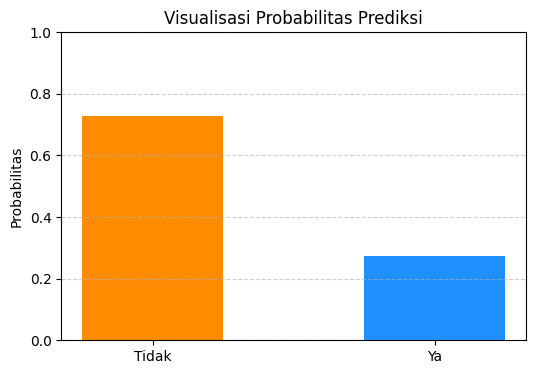

In [13]:
import matplotlib.pyplot as plt
# Probabilitas hasil prediksi Naive Bayes
prob_tidak = probabilities[0]
prob_ya = probabilities[1]

labels = ["Tidak", "Ya"]
values = [prob_tidak, prob_ya]

# Membuat bar chart dengan warna khusus dan grid
plt.figure(figsize=(6,4))
plt.bar(labels, values, width=0.5, color=["#FF8C00", "#1E90FF"])

plt.title("Visualisasi Probabilitas Prediksi")
plt.ylabel("Probabilitas")
plt.ylim(0, 1)

# Menambahkan grid
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Visualisasi – Confusion Matrix

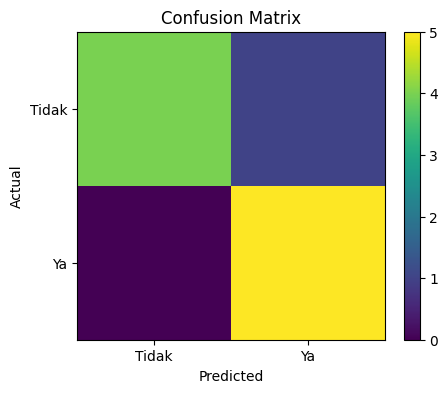

[[4 1]
 [0 5]]


In [14]:
from sklearn.metrics import confusion_matrix
# ===========================
# # CONFUSION MATRIX
# ===========================

y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks([0,1], ["Tidak", "Ya"])
plt.yticks([0,1], ["Tidak", "Ya"])
plt.show()

print(cm)